<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#3.-Comparing-Bayes,-logistic,-and-KNN-classifiers" data-toc-modified-id="3.-Comparing-Bayes,-logistic,-and-KNN-classifiers-1">3. Comparing Bayes, logistic, and KNN classifiers</a></span><ul class="toc-item"><li><span><a href="#a.-Divorce-classification/prediction" data-toc-modified-id="a.-Divorce-classification/prediction-1.1">a. Divorce classification/prediction</a></span><ul class="toc-item"><li><span><a href="#i.-Testing-accuracy" data-toc-modified-id="i.-Testing-accuracy-1.1.1">i. Testing accuracy</a></span></li><li><span><a href="#ii.-Classifiers-on-two-features" data-toc-modified-id="ii.-Classifiers-on-two-features-1.1.2">ii. Classifiers on two features</a></span></li></ul></li><li><span><a href="#b.-Handwritten-digits-classification" data-toc-modified-id="b.-Handwritten-digits-classification-1.2">b. Handwritten digits classification</a></span></li></ul></li></ul></div>

# 3. Comparing Bayes, logistic, and KNN classifiers

In [1]:
# Libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

%matplotlib inline
np.random.seed(503)

## a. Divorce classification/prediction

### i. Testing accuracy

In [2]:
# Load divorce dataset
divorce = np.loadtxt('q3.csv', dtype='float', delimiter=',')
print(divorce[0, :])

[ 1.56090333  3.68158714  3.45046749  3.21199803 -1.20304548  0.59770621
 -0.97009334 -0.75096972 -0.51149531 -0.13365959  0.12526002 -1.40625026
  0.75891827  0.30652916 -0.98858121  0.0042655   1.0439443  -0.48754846
 -0.93161605  2.24093899  1.79368851 -0.37483085 -0.11924822  0.72566911
 -0.70282507  0.09383243  0.8269317   0.21397464 -0.17634989  0.38363487
 -0.09786326 -1.10907881  1.70620287  2.23639208 -0.11786397 -0.10242896
  2.53542528  2.19260152  3.41112255  3.53360292  1.58484865  2.15949668
  1.72310929  2.11117926  3.35771401  2.07740087  1.18418242  3.95506859
  2.60804646  2.30362912  1.72165983  3.27501771  1.7610189   1.21523739
  1.        ]


In [3]:
# Split data: 80% train, 20% test
X, y = divorce[:, :-1], divorce[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
# Train classifiers, predict, and calculate test accuracy

# Naive Bayes
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
y_pred = clf_nb.predict(X_test)
nb_accuracy = np.where(y_pred == y_test)[0].shape[0] / y_test.shape[0]

# Logistic regression
clf_lr = LogisticRegression(penalty='none')
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)
lr_accuracy = np.where(y_pred == y_test)[0].shape[0] / y_test.shape[0]

# KNN
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)
knn_accuracy = np.where(y_pred == y_test)[0].shape[0] / y_test.shape[0]

In [5]:
print(f"Naive Bayes accuracy: {nb_accuracy}")
print(f"Logistic regression accuracy: {lr_accuracy}")
print(f"KNN accuracy: {knn_accuracy}")

Naive Bayes accuracy: 1.0
Logistic regression accuracy: 0.9117647058823529
KNN accuracy: 1.0


### ii. Classifiers on two features

In [6]:
# Choose first two features and split data
X, y = divorce[:, :2], divorce[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
# Train classifiers, predict, and calculate test accuracy

# Naive Bayes
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
y_pred = clf_nb.predict(X_test)
nb_accuracy = np.where(y_pred == y_test)[0].shape[0] / y_test.shape[0]

# Logistic regression
clf_lr = LogisticRegression(penalty='none')
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)
lr_accuracy = np.where(y_pred == y_test)[0].shape[0] / y_test.shape[0]

# KNN
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)
knn_accuracy = np.where(y_pred == y_test)[0].shape[0] / y_test.shape[0]

In [8]:
print(f"Naive Bayes accuracy: {nb_accuracy}")
print(f"Logistic regression accuracy: {lr_accuracy}")
print(f"KNN accuracy: {knn_accuracy}")

Naive Bayes accuracy: 0.9411764705882353
Logistic regression accuracy: 0.9411764705882353
KNN accuracy: 0.8823529411764706


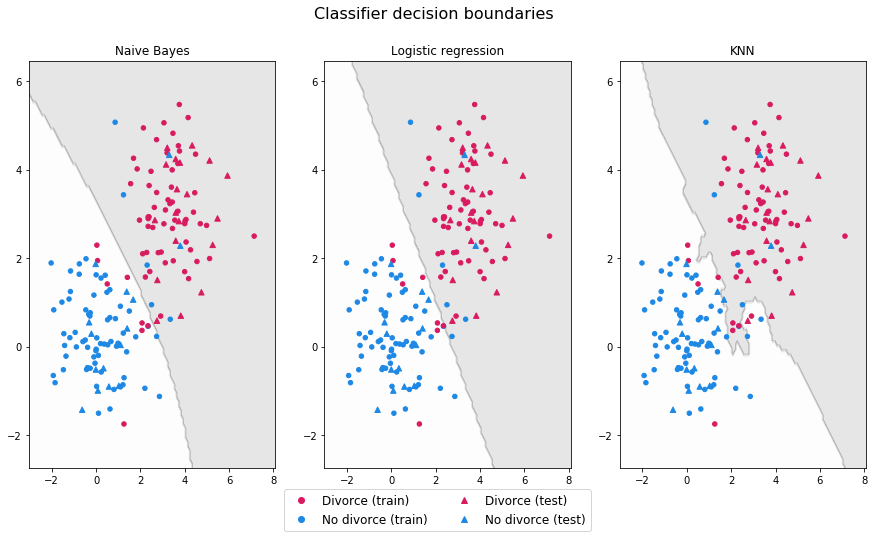

In [9]:
# Plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

y_train_color = np.where(y_train == 1, '#D81B60', '#1E88E5')
y_test_color = np.where(y_test == 1, '#D81B60', '#1E88E5')

fig, axs = plt.subplots(1, 3, sharex='col', figsize=(15, 7.5))

for i, clf, title in zip(range(3),
                      [clf_nb, clf_lr, clf_knn],
                      ['Naive Bayes', 'Logistic regression', 'KNN']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axs[i].contourf(xx, yy, Z, alpha=0.1, cmap='binary')  # Draw decision boundary
    # Plot data points
    axs[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train_color, s=20, edgecolors=y_train_color, marker='o')
    axs[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test_color, s=30, edgecolors=y_test_color, marker='^')
    axs[i].set_title(title, fontsize=12)
    
handles, labels = axs[2].get_legend_handles_labels()
legend_1 = Line2D(range(1), range(1), marker='o', linewidth=0,
                  color='#D81B60', markerfacecolor='#D81B60', label='Divorce (train)')
legend_2 = Line2D(range(1), range(1), marker='o', linewidth=0,
                  color='#1E88E5', markerfacecolor='#1E88E5', label='No divorce (train)')
legend_3 = Line2D(range(1), range(1), marker='^', linewidth=0,
                  color='#D81B60', markerfacecolor='#D81B60', label='Divorce (test)')
legend_4 = Line2D(range(1), range(1), marker='^', linewidth=0,
                  color='#1E88E5', markerfacecolor='#1E88E5', label='No divorce (test)')

fig.legend(handles=[legend_1, legend_2, legend_3, legend_4], ncol=2, loc='lower center', fontsize=12)
fig.suptitle("Classifier decision boundaries", fontsize=16)
    
plt.show()

## b. Handwritten digits classification

In [10]:
# Additional imports
from scipy.io import loadmat

In [11]:
# Load data and transpose
image_data = loadmat('data.mat')
X = image_data['data'].T

In [12]:
label_data = loadmat('label.mat')
y = np.where(label_data['trueLabel'].flatten() == 6, 1, 0)  # Label "6" = 1, else 0

In [13]:
# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
# Train classifiers, predict, and calculate test accuracy

# Naive Bayes
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
y_pred = clf_nb.predict(X_test)
nb_accuracy = np.where(y_pred == y_test)[0].shape[0] / y_test.shape[0]

# Logistic regression
clf_lr = LogisticRegression(penalty='none')
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)
lr_accuracy = np.where(y_pred == y_test)[0].shape[0] / y_test.shape[0]

# KNN
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)
knn_accuracy = np.where(y_pred == y_test)[0].shape[0] / y_test.shape[0]

In [15]:
print(f"Naive Bayes accuracy: {nb_accuracy}")
print(f"Logistic regression accuracy: {lr_accuracy}")
print(f"KNN accuracy: {knn_accuracy}")

Naive Bayes accuracy: 0.7738693467336684
Logistic regression accuracy: 0.9723618090452262
KNN accuracy: 0.9899497487437185
